In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from scipy.integrate import solve_ivp

In [2]:
def non_linear_oscillator(x, y, epsilon, gamma):
    return[y[1], (gamma * y[0]**2 + x**2 - epsilon) * y[0]]

In [3]:
L = 2
x_span = np.linspace(-L, L, 41)
N = len(x_span)
tol = 1e-4
D1, D2 = np.zeros(2), np.zeros(2)
V1, V2 = np.zeros((N, 2)), np.zeros((N, 2))

In [4]:
for gamma in [0.05, -0.05]:
    epsilon0, A = 0.1, 1e-6
    for jmodes in range(2):
        dA = 0.01
        for jj in range(100):
            epsilon, d_epsilon = epsilon0, 0.2
            for j in range(100):
                y0 = [A, np.sqrt(L**2 - epsilon) * A]
                sol = solve_ivp(lambda x, y: non_linear_oscillator(x, y, epsilon, gamma), [x_span[0], x_span[-1]], y0, t_eval=x_span)
                y_sol = sol.y.T
                x_sol = sol.t

                bc = y_sol[-1, 1] + np.sqrt(L**2 - epsilon) * y_sol[-1, 0]
                if abs(bc) < tol:
                    break
                
                if (-1)**(jmodes) * bc > 0:
                    epsilon += d_epsilon
                else:
                    epsilon -= d_epsilon
                    d_epsilon /= 2

            area = np.trapz(y_sol[:, 0]**2, x_sol)
            if abs(area - 1) < tol:
                break
            if area < 1:
                A += dA
            else:
                A -= dA
                dA /= 2
            
        epsilon0=epsilon+0.2
        if gamma > 0:
            D1[jmodes] = epsilon
            V1[:, jmodes] = np.abs(y_sol[:, 0])
        else:
            D2[jmodes] = epsilon
            V2[:, jmodes] = np.abs(y_sol[:, 0])

A5 = V1
A6 = D1
A7 = V2
A8 = D2

np.save("A5.npy", A5)
np.save("A6.npy", A6)
np.save("A7.npy", A7)
np.save("A8.npy", A8)


print("A6 Eigenvalues for gamma = 0.05:\n", A6, "\n")
print("A8 Eigenvalues for gamma = -0.05:\n", A8)

A6 Eigenvalues for gamma = 0.05:
 [1.01293945 2.92138672] 

A8 Eigenvalues for gamma = -0.05:
 [0.97404785 2.89309082]


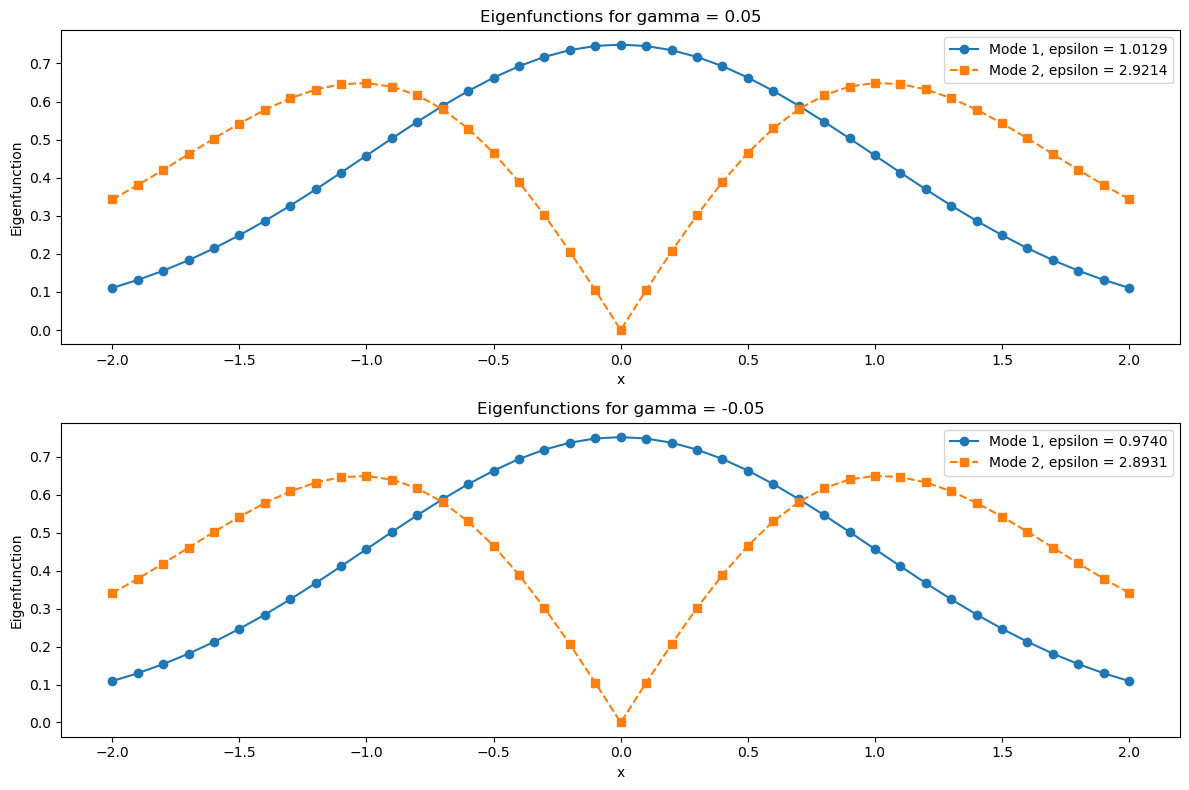

In [5]:
# Plot for part (c)
plt.figure(figsize=(12, 8))

# Plot for gamma = 0.05
plt.subplot(2, 1, 1)
plt.plot(x_span, A5[:, 0], label=f'Mode 1, epsilon = {A6[0]:.4f}', linestyle='-', marker='o')
plt.plot(x_span, A5[:, 1], label=f'Mode 2, epsilon = {A6[1]:.4f}', linestyle='--', marker='s')
plt.title("Eigenfunctions for gamma = 0.05")
plt.xlabel("x")
plt.ylabel("Eigenfunction")
plt.legend()

# Plot for gamma = -0.05
plt.subplot(2, 1, 2)
plt.plot(x_span, A7[:, 0], label=f'Mode 1, epsilon = {A8[0]:.4f}', linestyle='-', marker='o')
plt.plot(x_span, A7[:, 1], label=f'Mode 2, epsilon = {A8[1]:.4f}', linestyle='--', marker='s')
plt.title("Eigenfunctions for gamma = -0.05")
plt.xlabel("x")
plt.ylabel("Eigenfunction")
plt.legend()

plt.tight_layout()
plt.show()